# **Introduction**


The used car market in India is a thriving multi-billion dollar industry, rapidly evolving beyond the perception of being merely a compromise choice. In 2023 alone, approximately 5.2 million used cars were sold, reflecting its significant role in the automotive sector. However, this market remains highly volatile, with prices often exhibiting unpredictable fluctuations.

In this project, we delve into the complexities of the used car market by analyzing data sourced from Cardekho.com. We employ advanced machine learning (ML) and deep learning (DL) models to explore the feasibility of accurately predicting used car prices. Our goal is to assess whether these sophisticated models can enhance price prediction accuracy amidst the inherent market volatility. Through this analysis, we aim to provide valuable insights and potentially improve the pricing strategies within the used car industry.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset (8).csv


In [ ]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import math

Install and import CatBoost. CatBoost (Categorical Boosting) is an open-source machine learning library developed by Yandex, designed for gradient boosting on decision trees.

In [ ]:
!pip install catboost
import catboost
from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv("/content/cardekho_dataset.csv")
df.head(10)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
9,12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


The dataset is clean with no missing values with **15,411 car examples**


# **Features of the dataset**
*  car_name: Car's Full name, which includes brand and specific model name.
*  brand: Brand Name of the particular car.


*   model: Exact model name of the car of a particular brand.
*   seller_type: Which Type of seller is selling the used car

*   fuel_type: Fuel used in the used car, which was put up on sale.

*   transmission_type: Transmission used in the used car, which was put on sale.

*   vehicle_age: The count of years since car was bought.
*   mileage: It is the number of kilometer the car runs per litre.


*   engine: It is the engine capacity in cc(cubic centimeters)

*   max_power: Max power it produces in BHP.

*   seats: Total number of seats in car.
*   selling_price: The sale price which was put up on website.

# **We now visualize the distribution in the dataset**

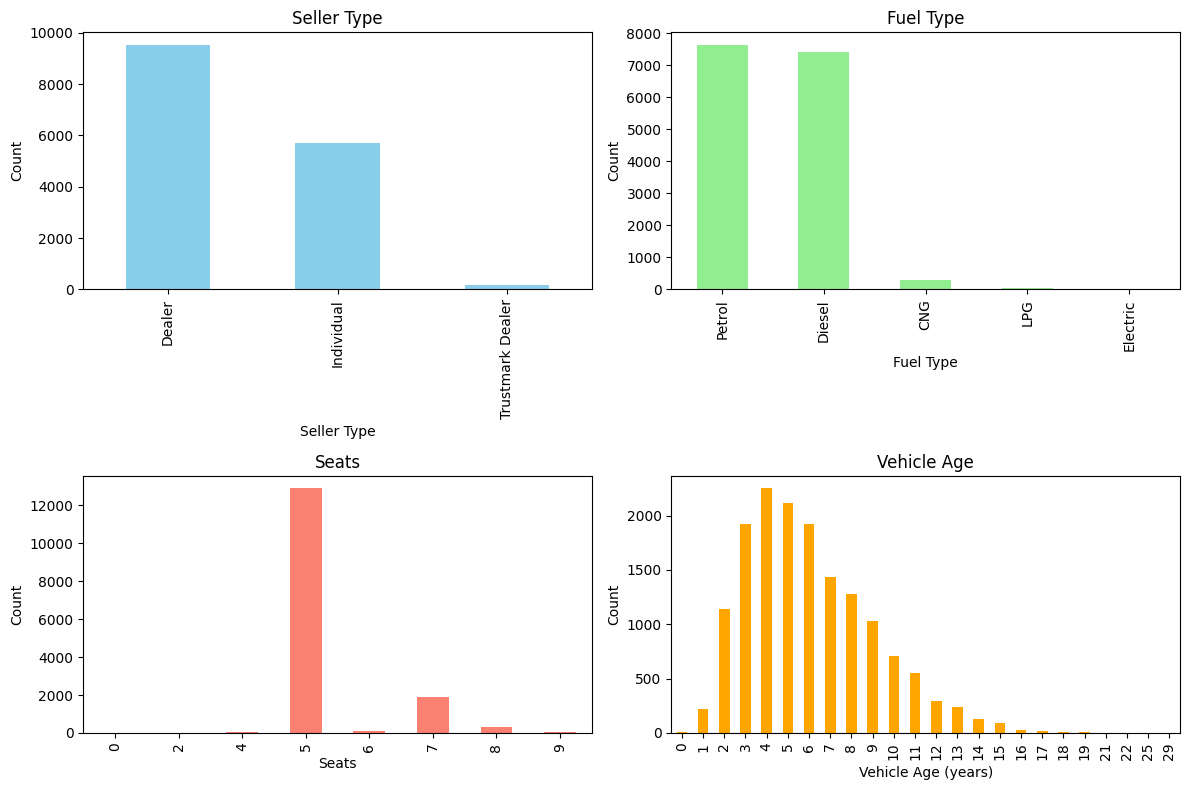

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot bar graph for 'seller_type'
df['seller_type'].value_counts().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Seller Type')
axs[0, 0].set_xlabel('Seller Type')
axs[0, 0].set_ylabel('Count')

# Plot bar graph for 'transmission_type'
df['fuel_type'].value_counts().plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Fuel Type')
axs[0, 1].set_xlabel('Fuel Type')
axs[0, 1].set_ylabel('Count')

# Plot bar graph for 'seats'
df['seats'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Seats')
axs[1, 0].set_xlabel('Seats')
axs[1, 0].set_ylabel('Count')

# Plot bar graph for 'vehicle_age'
df['vehicle_age'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Vehicle Age')
axs[1, 1].set_xlabel('Vehicle Age (years)')
axs[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


The dataset shows a higher number of petrol and diesel cars compared to CNG, LPG, and electric vehicles. It also includes more 5-seater cars (typically hatchbacks and sedans) and 7-seater vehicles (like SUVs and MUVs). There are issues with the 0-seater entries, which are clearly incorrect and need to be addressed. Additionally, most of the cars are between 3 to 7 years old, suggesting that this is the optimal time for owners to sell their vehicles to achieve the best value.

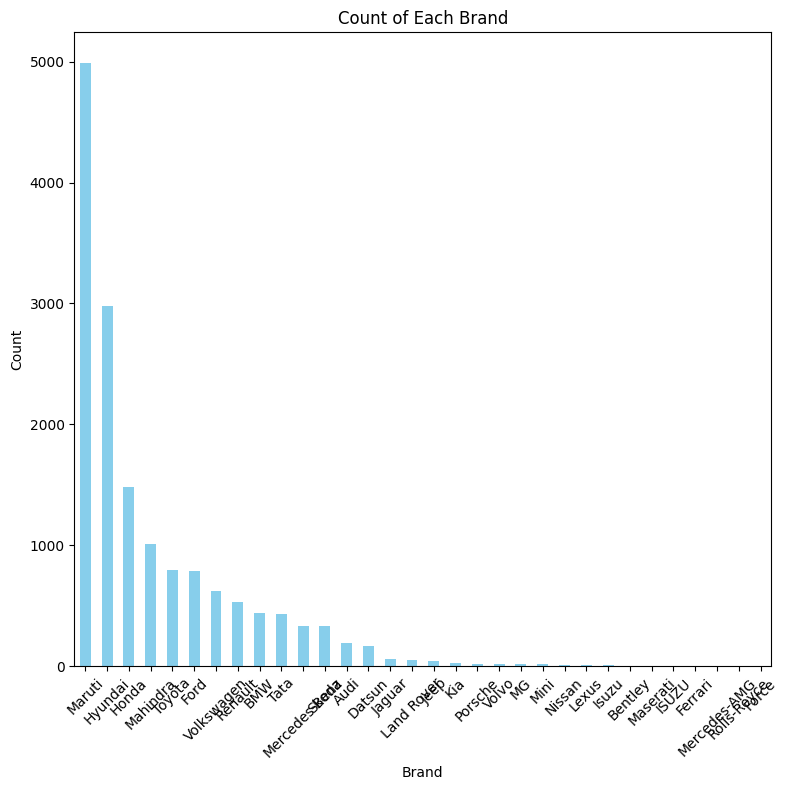

In [ ]:
brand_counts = df['brand'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 8))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset primarily features commercial vehicle brands, with Maruti dominating due to its status as one of the largest-selling brands in India, known for its low after-sales costs and reliability. Hyundai and Honda follow as the next most prominent brands

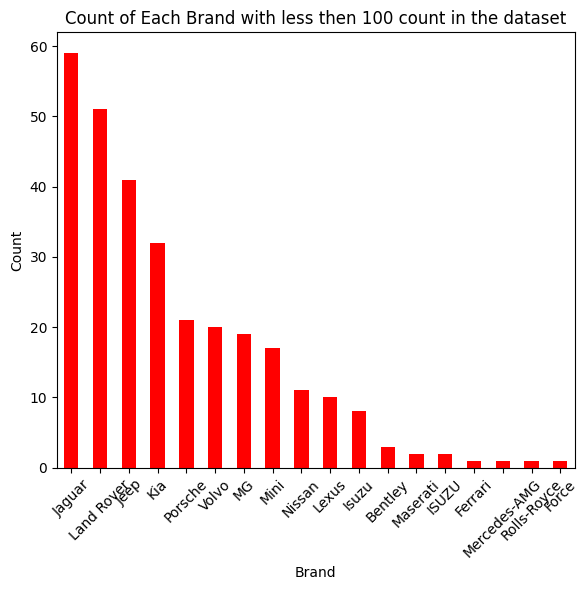

In [ ]:
brand_counts = df['brand'].value_counts()
small_brand = brand_counts[brand_counts < 100]

plt.figure(figsize=(6, 6))
small_brand.plot(kind='bar', color='r')
plt.title('Count of Each Brand with less then 100 count in the dataset')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most of the highend luxury brands have a count below 100 units. Luxury cars are usually not listed on the second hand market usually because of:



*   Depreciation: Luxury cars tend to depreciate faster than mainstream vehicles. Owners might prefer to keep their luxury cars longer to avoid taking a significant financial hit.

*   Maintenance Costs: The cost of maintaining and repairing luxury cars can be high. Some owners may choose to keep their vehicle rather than incur these costs, especially if they’re already accustomed to the expenses.

*   Emotional Attachment: Luxury cars often have a strong emotional value for their owners. People might form a personal connection with their vehicle and be reluctant to part with it.
*   Perceived Value: Luxury cars often have a higher perceived value, and owners might believe that their vehicle's resale value is too low to justify selling it.






In [ ]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.nunique()

,0
Unnamed: 0,15411
car_name,121
brand,32
model,120
vehicle_age,24
km_driven,3688
seller_type,3
fuel_type,5
transmission_type,2
mileage,411


In [ ]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df["seats"].unique()

array([5, 8, 7, 6, 4, 2, 9, 0])

In [ ]:
df[df["seats"]==0]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,4098,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,15992,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


This seems to be an error of data entry as two car have been alloted with 0 seat number

In [ ]:
df[df["model"]=="Kicks"]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1259,1618,Nissan Kicks,Nissan,Kicks,1,15000,Individual,Petrol,Manual,14.23,1330,153.87,5,1000000
2485,3170,Nissan Kicks,Nissan,Kicks,1,7500,Individual,Diesel,Manual,20.45,1461,108.50,5,850000
3111,3961,Nissan Kicks,Nissan,Kicks,2,4000,Dealer,Petrol,Manual,14.23,1498,104.55,5,890000
4937,6266,Nissan Kicks,Nissan,Kicks,2,40000,Individual,Diesel,Manual,19.39,1461,108.00,5,1200000
9645,12365,Nissan Kicks,Nissan,Kicks,2,11687,Trustmark Dealer,Petrol,Manual,14.23,1498,104.55,5,880000
12619,15992,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000
13160,16701,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Petrol,Manual,14.23,1498,104.55,5,950000
14275,18102,Nissan Kicks,Nissan,Kicks,2,6200,Individual,Diesel,Manual,19.39,1461,108.00,5,1450000


Both the car has a seating capacity of 5, hence replcaing the number of seats

In [ ]:
df.loc[df['model'] == 'Kicks', 'seats'] = df.loc[df['model'] == 'Kicks', 'seats'].replace(0, 5)
df.loc[df['model'] == 'City', 'seats'] = df.loc[df["model"]== 'City', 'seats'].replace(0, 5)

In [ ]:
df[df["seats"] == 2]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
311,397,BMW Z4,BMW,Z4,1,2000,Dealer,Petrol,Automatic,11.29,2998,335.00,2,8250000
8455,10869,BMW Z4,BMW,Z4,6,27000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,3999000
10385,13244,BMW Z4,BMW,Z4,5,17000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,4800000
11245,14283,BMW Z4,BMW,Z4,9,33000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,3425000
11955,15169,BMW Z4,BMW,Z4,10,24000,Dealer,Petrol,Automatic,10.37,2979,306.00,2,3300000
12820,16255,BMW Z4,BMW,Z4,11,5022,Dealer,Petrol,Automatic,10.37,2979,306.00,2,3100000
13040,16554,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,9,23000,Dealer,Petrol,Automatic,10.93,3498,272.00,2,1996000


In [ ]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [ ]:
df['mileage'] = df['mileage'].round(0).astype(int)
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,20,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,19,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,21,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,23,1498,98.59,5,570000


In [ ]:
df["brand"].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

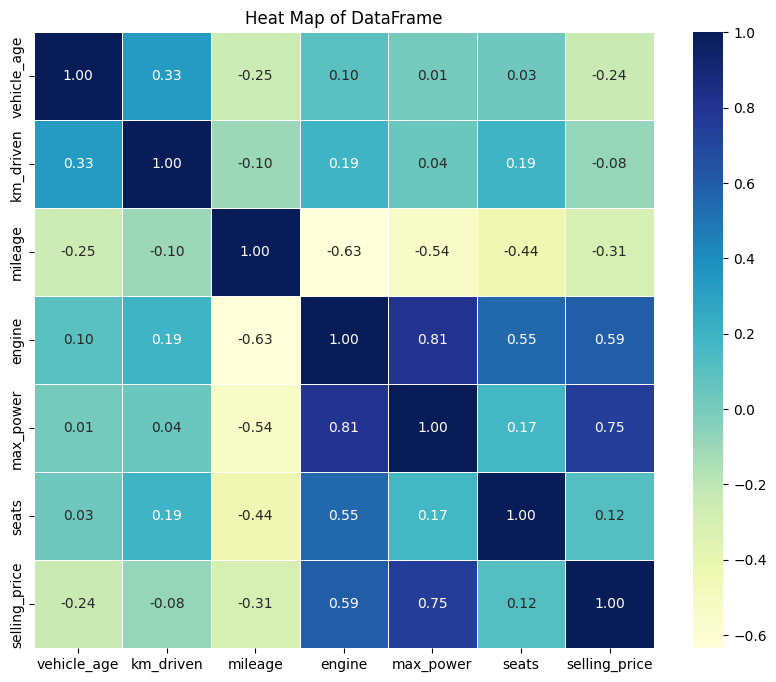

In [ ]:
df_corr = df [['vehicle_age','km_driven', 'mileage',	'engine', 'max_power',	'seats',	'selling_price'	]]
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)

# Add title
plt.title('Heat Map of DataFrame')

# Show the plot
plt.show()

**From the heat map, we can infer that engine size and maximum power are strongly and positively correlated with the price, indicating that larger and more powerful cars tend to be more expensive. In contrast, mileage is negatively correlated with price. This could be due to luxury cars typically having lower mileage but higher prices. However, we need to segment the data more effectively, as high mileage is often a key selling point for commercial vehicles. Therefore, mileage should be given appropriate weight in price predictions, especially within the commercial vehicle segment.**

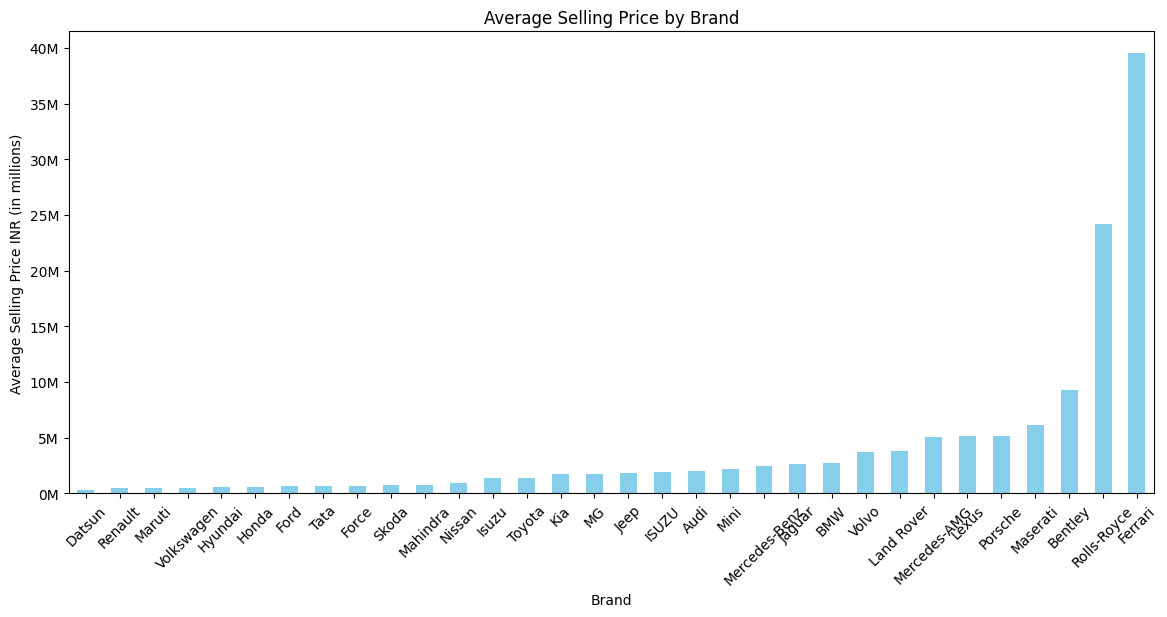

In [ ]:
# Calculate average selling price by brand
import matplotlib.ticker as ticker
avg_price_by_brand = df.groupby('brand')['selling_price'].mean().sort_values()

# Plot
plt.figure(figsize=(14, 6))
avg_price_by_brand.plot(kind='bar', color='skyblue')

# Formatting the y-axis to display values in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x * 1e-6:.0f}M'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.title('Average Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price INR (in millions)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

# Plot using Plotly Express
fig = px.scatter(df, x='model', y='selling_price', color='brand', title='Selling Price vs. Model',
                 labels={'model': 'Model', 'selling_price': 'Selling Price'},
                 hover_name='model', height=800)

fig.update_xaxes(tickangle=90)  # Rotate x-axis labels
fig.show()


There is a huge variation of price specially in luxury brands specially in some models of Mercedes, Audi, BMW etc

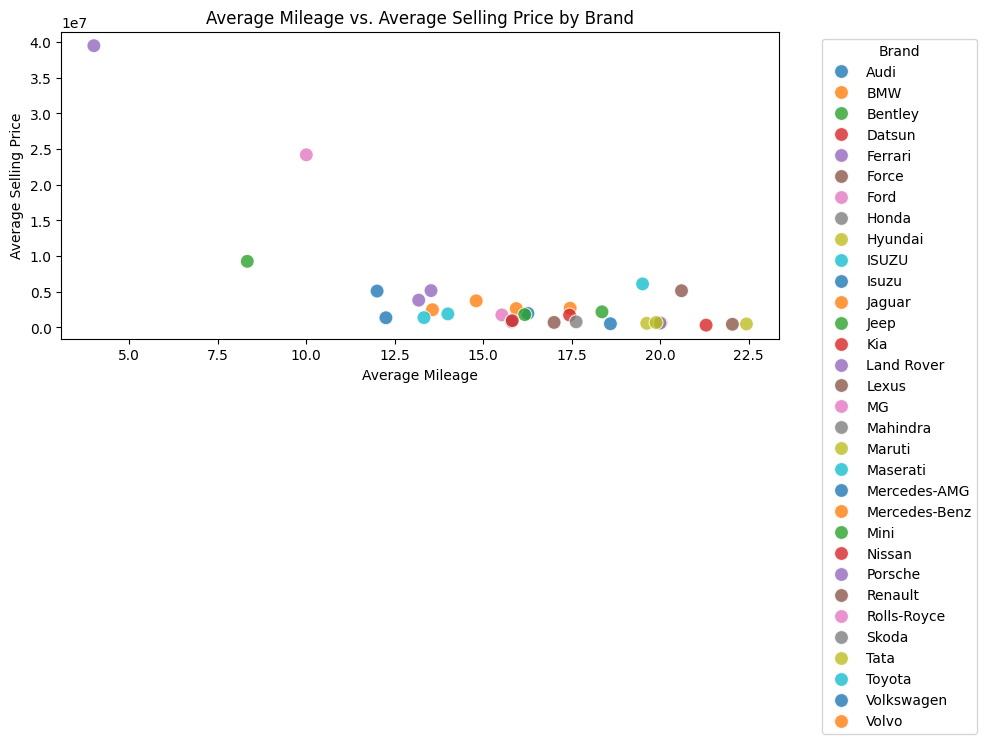

Correlation coefficient between average mileage and average selling price: -0.70


In [ ]:
# Calculate average mileage and selling price by brand
avg_data = df.groupby('brand').agg({
    'mileage': 'mean',
    'selling_price': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='selling_price', data=avg_data, hue='brand', palette='tab10', s=100, alpha=0.8)

# Add titles and labels
plt.title('Average Mileage vs. Average Selling Price by Brand')
plt.xlabel('Average Mileage')
plt.ylabel('Average Selling Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

# Calculate the correlation coefficient
correlation = avg_data['mileage'].corr(avg_data['selling_price'])
print(f'Correlation coefficient between average mileage and average selling price: {correlation:.2f}')


Most of the brands usually claim their mileage between 12 km/litre to 20 km/litre

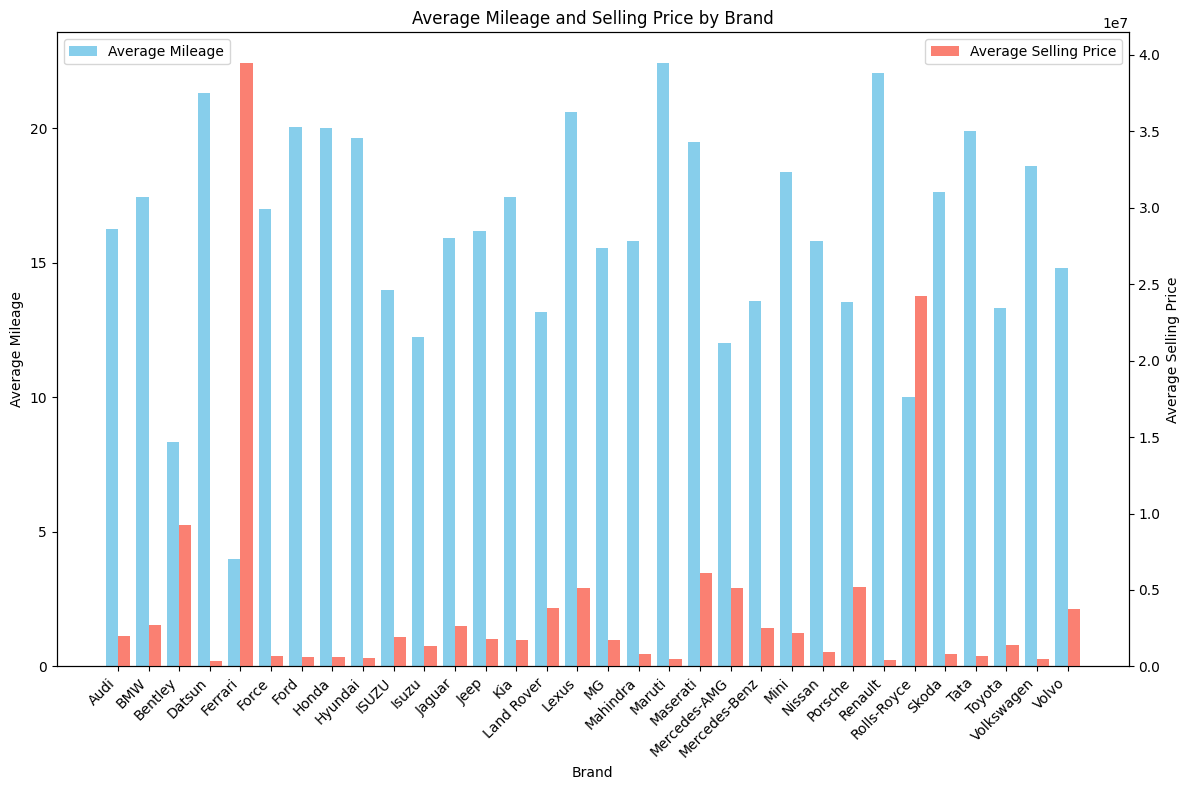

In [ ]:
# Calculate average mileage and selling price by brand
avg_data = df.groupby('brand').agg({
    'mileage': 'mean',
    'selling_price': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot average mileage
bar_width = 0.4
index = range(len(avg_data['brand']))
bars1 = ax1.bar(index, avg_data['mileage'], bar_width, label='Average Mileage', color='skyblue')

# Create a second y-axis for selling price
ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], avg_data['selling_price'], bar_width, label='Average Selling Price', color='salmon')

# Labels and titles
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Mileage')
ax2.set_ylabel('Average Selling Price')
ax1.set_title('Average Mileage and Selling Price by Brand')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(avg_data['brand'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

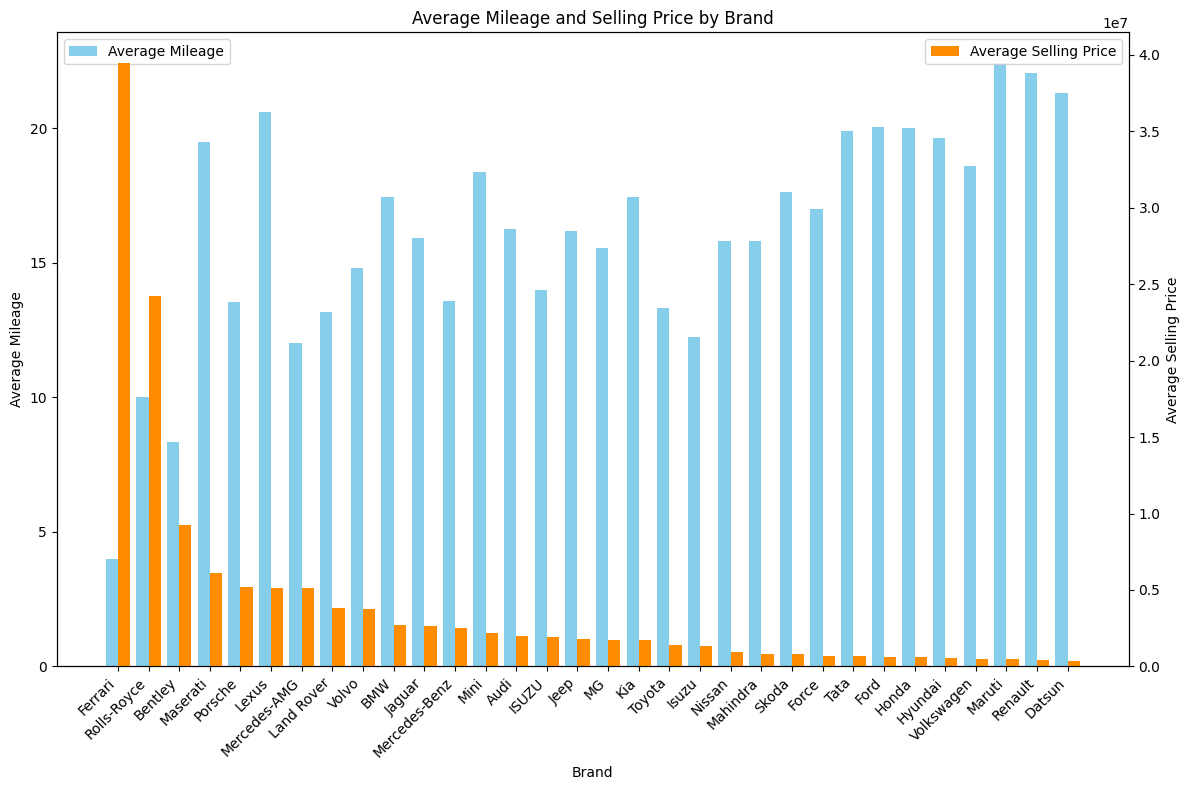

In [ ]:
# Calculate average mileage and selling price by brand
avg_data = df.groupby('brand').agg({
    'mileage': 'mean',
    'selling_price': 'mean'
}).reset_index()

# Sort data by average selling price
avg_data = avg_data.sort_values(by='selling_price', ascending=False).reset_index(drop=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot average mileage
bar_width = 0.4
index = range(len(avg_data['brand']))
bars1 = ax1.bar(index, avg_data['mileage'], bar_width, label='Average Mileage', color='skyblue')

# Create a second y-axis for selling price
ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], avg_data['selling_price'], bar_width, label='Average Selling Price', color='darkorange')

# Labels and titles
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Mileage')
ax2.set_ylabel('Average Selling Price')
ax1.set_title('Average Mileage and Selling Price by Brand')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(avg_data['brand'], rotation=45, ha='right')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

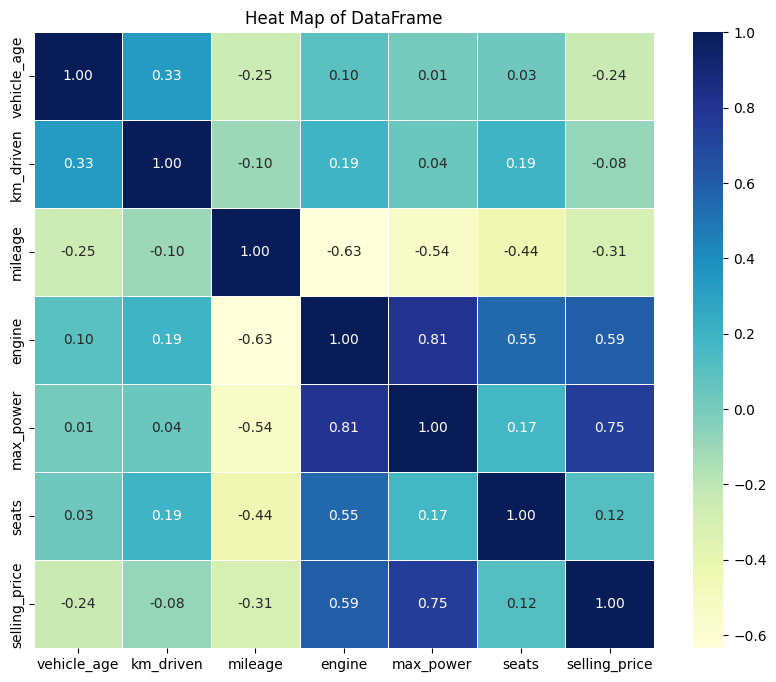

In [ ]:
df_corr = df[['vehicle_age','km_driven', 'mileage',	'engine', 'max_power',	'seats',	'selling_price'	]]
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)

# Add title
plt.title('Heat Map of DataFrame')

# Show the plot
plt.show()

**We will remove 15 data points to compare our final prediction**

In [ ]:
df_for_prediction = df.sample(n=15, random_state=42)  # random_state for reproducibility

# Remove these entries from the original DataFrame
df= df.drop(df_for_prediction.index)



We will use feature engineering by creating columns of:

 **Luxury brands** that includes 'Ferrari', 'Rolls-Royce', 'Bentley', 'Maserati', 'Porsche', 'Lexus', 'Mercedes-AMG', 'Land Rover', 'Volvo', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Mini', 'Audi', 'ISUZU'

 .

  **Semi-Luxury brands** which includes 'Jeep', 'MG', 'Kia', 'Toyota', 'Isuzu', 'Nissan', 'Mahindra', 'Skoda', 'Force'



  .


  and **Commercial brands** which includes 'Tata', 'Ford', 'Honda', 'Hyundai', 'Volkswagen', 'Maruti', 'Renault', 'Datsun'

  And also drop some columns are drop including the brand column as the above mentioned brand category would be better



We also one hot encode the columns of 'seller_type', 'fuel_type', 'transmission_type'. One-hot encoding transforms categorical variables into a binary matrix, enabling machine learning models to interpret categorical data as numerical input. It prevents models from misinterpreting categorical values as ordinal, thereby improving predictive accuracy and model performance.



In [ ]:
#Preprocessing pipeline for CAT Booster model

def preprocess_car_data_cat(df):
    # Define brand categories
    luxury_brands = ['Ferrari', 'Rolls-Royce', 'Bentley', 'Maserati', 'Porsche', 'Lexus', 'Mercedes-AMG', 'Land Rover', 'Volvo', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Mini', 'Audi', 'ISUZU']
    semi_luxury_brands = ['Jeep', 'MG', 'Kia', 'Toyota', 'Isuzu', 'Nissan', 'Mahindra', 'Skoda', 'Force']
    commercial_brands = ['Tata', 'Ford', 'Honda', 'Hyundai', 'Volkswagen', 'Maruti', 'Renault', 'Datsun']

    # Create the new feature 'brand_category'
    def categorize_brand(brand):
        if brand in luxury_brands:
            return 'Luxury'
        elif brand in semi_luxury_brands:
            return 'Semi-Luxury'
        elif brand in commercial_brands:
            return 'Commercial'
        else:
            return 'Unknown'  # For brands not in any of the defined categories

    df['brand_category'] = df['brand'].apply(categorize_brand)

    # Columns to be one-hot encoded
    columns_to_encode = ['seller_type', 'fuel_type', 'transmission_type']

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

    # Replace True/False with 1/0
    df_encoded.replace({True: 1, False: 0}, inplace=True)

    # Drop unwanted columns
    df_encoded = df_encoded.drop(columns=['Unnamed: 0', 'car_name', 'brand'])

    # # Split the data into features (X) and target (Y)
    # X = df_encoded.drop(columns=['selling_price'])
    # Y = df_encoded['selling_price']

    return df_encoded

In [ ]:
df_cat =preprocess_car_data_cat(df)

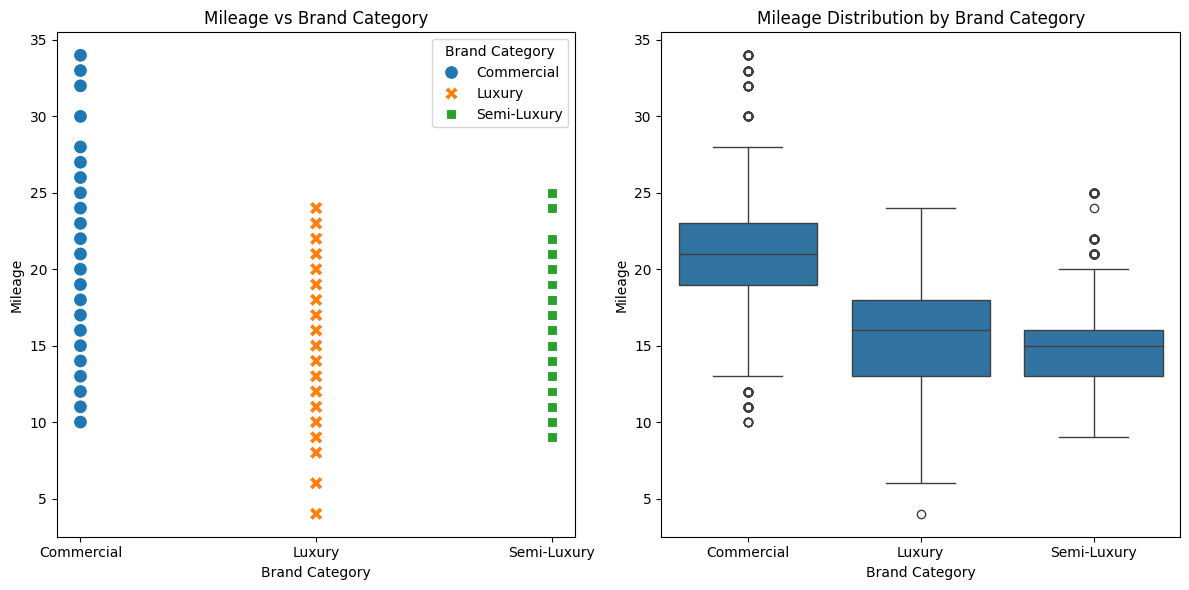

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='brand_category', y='mileage', data=df_cat, hue='brand_category', style='brand_category', s=100, ax=ax[0])
ax[0].set_title('Mileage vs Brand Category')
ax[0].set_xlabel('Brand Category')
ax[0].set_ylabel('Mileage')
ax[0].legend(title='Brand Category')

# Box plot
sns.boxplot(x='brand_category', y='mileage', data=df_cat, ax=ax[1])
ax[1].set_title('Mileage Distribution by Brand Category')
ax[1].set_xlabel('Brand Category')
ax[1].set_ylabel('Mileage')

# Show the plots
plt.tight_layout()
plt.show()


We can see majority of commercial brands i.e. above 50% have a mileage of 22 km/litre, and can also be concluded that mileage will not be a factor for luxury and semi luxury brands

# **CatBoost Regressor**

The first algorithm we use is a **CatBoost Regressor**. It is a specific type of CatBoost model designed for regression tasks. CatBoost, short for Categorical Boosting, is an advanced gradient boosting algorithm.It builds upon the traditional gradient boosting framework but includes enhancements specifically geared toward handling categorical features and improving model performance.


CatBoost Regressor uses gradient boosting, which combines multiple weak learners (decision trees) to create a strong predictive model. This iterative process helps in reducing errors by focusing on the residuals of previous iterations.

Unlike many machine learning algorithms that require manual encoding of categorical features, CatBoost can handle categorical variables directly. This is especially useful in datasets with many categorical features, such as a used car dataset.


In [ ]:
# # Separate features (X) and target variable (Y)
# X = df_encoded.drop(columns=['selling_price'])
# Y = df_encoded['selling_price']


X = df_cat.drop(columns=['selling_price'])
Y = df_cat['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define categorical columns
categorical_features = ['model', 'brand_category']
# Split the data into training and testing sets
catmodel = CatBoostRegressor(

    iterations=4000,  # Number of boosting iterations
    learning_rate=0.01,  # Learning rate
    depth=12,  # Depth of trees
    loss_function='RMSE',  # Loss function
    eval_metric='RMSE',  # Evaluation metric
    random_state=42,  # Random seed for reproducibility
    cat_features=categorical_features,  # Specify categorical features
    verbose=500  # Verbose output every 100 iterations
)



catmodel.fit(X_train, Y_train, eval_set=(X_test, Y_test), verbose=500,  init_model='catboost_model.cbm')
# catmodel.fit(X_train, Y_train, eval_set=(X_test, Y_test), verbose=500)

# Predict on the test set
Y_pred = catmodel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")





0:	learn: 114565.8353980	test: 121953.6549905	best: 121953.6549905 (0)	total: 142ms	remaining: 9m 29s
500:	learn: 98867.5543633	test: 122688.3768762	best: 121938.1452708 (1)	total: 48.8s	remaining: 5m 40s
1000:	learn: 91635.5924582	test: 123463.1923659	best: 121938.1452708 (1)	total: 1m 33s	remaining: 4m 41s
1500:	learn: 86188.1850814	test: 124196.4425490	best: 121938.1452708 (1)	total: 2m 26s	remaining: 4m 3s
2000:	learn: 81855.4616042	test: 124846.5239346	best: 121938.1452708 (1)	total: 3m 16s	remaining: 3m 16s
2500:	learn: 78186.7139651	test: 125455.4201663	best: 121938.1452708 (1)	total: 4m 7s	remaining: 2m 28s
3000:	learn: 74935.5337677	test: 125997.1781955	best: 121938.1452708 (1)	total: 5m	remaining: 1m 40s
3500:	learn: 72063.5909394	test: 126545.9478083	best: 121938.1452708 (1)	total: 5m 53s	remaining: 50.4s
3999:	learn: 69410.0264635	test: 127093.0517791	best: 121938.1452708 (1)	total: 6m 47s	remaining: 0us

bestTest = 121938.1453
bestIteration = 1

Shrink model to first 2 ite

The model was previously trained for 5000 iterations and due to lack of more data, the model is clearly overfitting.

In [ ]:
Save the model
catmodel.save_model('catboost_model.cbm')

 We further create a function to preprocess the dataset for regression models. Here we also one-hot encode the car model column, which means **every car model is now a feature**, allowing the model to better capture the distinct characteristics and influence of each car model on the target variable by treating each model as a separate feature rather than a single categorical variable.

In [ ]:
#Preprocessing pipeline for Regression models

def preprocess_car_data_reg(df):
    # Define brand categories
    luxury_brands = ['Ferrari', 'Rolls-Royce', 'Bentley', 'Maserati', 'Porsche', 'Lexus', 'Mercedes-AMG', 'Land Rover', 'Volvo', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Mini', 'Audi', 'ISUZU']
    semi_luxury_brands = ['Jeep', 'MG', 'Kia', 'Toyota', 'Isuzu', 'Nissan', 'Mahindra', 'Skoda', 'Force']
    commercial_brands = ['Tata', 'Ford', 'Honda', 'Hyundai', 'Volkswagen', 'Maruti', 'Renault', 'Datsun']

    # Create the new feature 'brand_category'
    def categorize_brand(brand):
        if brand in luxury_brands:
            return 'Luxury'
        elif brand in semi_luxury_brands:
            return 'Semi-Luxury'
        elif brand in commercial_brands:
            return 'Commercial'
        else:
            return 'Unknown'  # For brands not in any of the defined categories

    df['brand_category'] = df['brand'].apply(categorize_brand)

    # Columns to be one-hot encoded
    columns_to_encode = ['seller_type', 'fuel_type', 'transmission_type', 'model', 'brand_category']

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

    # Replace True/False with 1/0
    df_encoded.replace({True: 1, False: 0}, inplace=True)

    # Drop unwanted columns
    df_encoded = df_encoded.drop(columns=['Unnamed: 0', 'car_name', 'brand'])

    # # Split the data into features (X) and target (Y)
    # X = df_encoded.drop(columns=['selling_price'])
    # Y = df_encoded['selling_price']

    return df_encoded

In [ ]:
df_reg = preprocess_car_data_reg(df)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15396 entries, 0 to 15410
Columns: 140 entries, vehicle_age to brand_category_Semi-Luxury
dtypes: float64(1), int64(139)
memory usage: 16.6 MB


**Standard Scaler** standardizes features to a common scale, which can improve model convergence and performance by ensuring equal contribution of features. It also enhances numerical stability and prevents issues where features with larger ranges dominate the training process.

In [ ]:
#  Split the data into features (X) and target (Y)
X = df_reg.drop(columns=['selling_price'])
Y = df_reg['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the parameters from the training data
X_test = scaler.transform(X_test)


We start with a basic Linear Regression Model.

In [ ]:
#Linear Regression Model

poly = PolynomialFeatures(degree=1, include_bias=False)


X_train_poly = poly.fit_transform(X_train)


X_test_poly = poly.transform(X_test)


lr_model = LinearRegression()


lr_model.fit(X_train_poly, Y_train)

# Predict on the test set
Y_pred = lr_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 85246709265335888.0000


As we can see, the Linear Regression model performs very poorly so we need more complex models

# **Gradient Boosting Regressor**

We now use **Gradient Boosting Regressor**. Gradient Boosting Regressor is an ensemble learning method that builds models sequentially, with each new model correcting the errors of the previous ones. Its uniqueness lies in its iterative approach to minimize the residual errors using gradient descent, which often results in high predictive accuracy and robustness against overfitting.

In [ ]:
# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.1,
    max_depth=8,
    random_state=42         # Seed for reproducibility
)

# Fit the model to the training data
gbr_model.fit(X_train, Y_train)

Y_pred = gbr_model.predict(X_test)

# Calculate mean squared error and root mean squared error
mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 190676.4645


# **Random Forest Regressor**
RandomForestRegressor is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of these trees. Its uniqueness lies in its use of bagging (bootstrap aggregating) and feature randomness to enhance model stability and reduce overfitting.

In [ ]:
rfr_model = RandomForestRegressor(
    n_estimators=500,       # Number of trees in the forest
    max_depth=120,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    max_features='sqrt',    # Number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random seed for reproducibility
)

# Train the model
rfr_model.fit(X_train, Y_train)

Y_train_pred =rfr_model.predict(X_train)
Y_test_pred = rfr_model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f'Training RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Training RMSE: 125935.8270
Test RMSE: 191155.5762


# **Deep Neural Network**

We will also make a six layer deep neural network using PyTorch. Even though NN are hungry for data, I believe it could be worth observing the results

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the parameters from the training data
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)

Pepare the dataset for model using DataLoader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Print shapes and types for verification
print("Training features shape:", X_train_tensor.shape)
print("Training target shape:", Y_train_tensor.shape)
print("Test features shape:", X_test_tensor.shape)
print("Test target shape:", Y_test_tensor.shape)

Training features shape: torch.Size([12316, 139])
Training target shape: torch.Size([12316])
Test features shape: torch.Size([3080, 139])
Test target shape: torch.Size([3080])


In [ ]:
#Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:


class TorchRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Linear(in_features=139, out_features=512),
            nn.BatchNorm1d(512),  # Batch Normalization
            nn.SELU()  # SELU activation
        )
        self.block_2 = nn.Sequential(
            nn.Linear(in_features=512, out_features=1028),
            nn.BatchNorm1d(1028),  # Batch Normalization
            nn.SELU()
        )
        self.block_3 = nn.Sequential(
            nn.Linear(in_features=1028, out_features=2056),
            nn.BatchNorm1d(2056),  # Batch Normalization
            nn.SELU()
        )
        self.block_4 = nn.Sequential(
            nn.Linear(in_features=2056, out_features=512),
            nn.BatchNorm1d(512),  # Batch Normalization
            nn.SELU()
        )
        self.block_5 = nn.Sequential(
            nn.Linear(in_features=512, out_features=1)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        return x

# # Instantiate the model
# model = TorchRegression()


In [ ]:
model_1 = TorchRegression().to(device)
model_1

TorchRegression(
  (block_1): Sequential(
    (0): Linear(in_features=139, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SELU()
  )
  (block_2): Sequential(
    (0): Linear(in_features=512, out_features=1028, bias=True)
    (1): BatchNorm1d(1028, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SELU()
  )
  (block_3): Sequential(
    (0): Linear(in_features=1028, out_features=2056, bias=True)
    (1): BatchNorm1d(2056, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SELU()
  )
  (block_4): Sequential(
    (0): Linear(in_features=2056, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SELU()
  )
  (block_5): Sequential(
    (0): Linear(in_features=512, out_features=1, bias=True)
  )
)

We create a 5 layers neural network with SELU activation and batch normalization.

SELU (Scaled Exponential Linear Unit) is an activation function that helps networks self-normalize by maintaining a mean close to zero and a variance close to one. This property helps in stabilizing the training process and mitigating vanishing/exploding gradient problems.

A 5-layer neural network with millions of trainable parameters can capture complex patterns and relationships in the data, improving its ability to learn intricate features and make accurate predictions. The depth and large number of parameters allow for greater expressiveness and flexibility in modeling.

In [ ]:
model_1.parameters()

<generator object Module.parameters at 0x7a730d7f76f0>

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [ ]:
sample_batch, label_batch = next(iter(train_loader))
sample_batch.shape, label_batch.shape

(torch.Size([32, 139]), torch.Size([32]))

In [ ]:
# Training loop
EPOCHS = 50
best_test_rmse = float('inf')  # Initialize with a very large value to ensure any RMSE will be better
train_losses = []
test_losses = []
best_model_state = None

for epoch in range(EPOCHS):
    model_1.train()
    train_loss = 0
    for batch, (X_batch, y_batch) in enumerate(train_loader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_preds = model_1(X_batch).squeeze()
        loss = loss_fn(y_preds, y_batch.float())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Average training loss for this epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Convert MSE to RMSE
    train_rmse = torch.sqrt(torch.tensor(train_loss)).item()

    model_1.eval()
    test_loss = 0
    with torch.no_grad():
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)

            y_test_preds = model_1(X_test_batch).squeeze()
            loss = loss_fn(y_test_preds, y_test_batch.float())

            test_loss += loss.item()


    test_loss /= len(test_loader)
    test_losses.append(test_loss)


    test_rmse = torch.sqrt(torch.tensor(test_loss)).item()

    # Print results every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{EPOCHS}, Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')

    # Save the best model
    if test_rmse < best_test_rmse:
        best_test_rmse = test_rmse
        best_model_state = model_1.state_dict()

# Save the best model state to file
torch.save(best_model_state, 'best_model.pth')

# Print final results
print("Final Train RMSE:", train_rmse)
print("Final Test RMSE:", test_rmse)



Epoch 10/50, Train RMSE: 671316.75, Test RMSE: 438088.84
Epoch 20/50, Train RMSE: 493308.91, Test RMSE: 214390.28
Epoch 30/50, Train RMSE: 444973.41, Test RMSE: 203395.19
Epoch 40/50, Train RMSE: 418000.19, Test RMSE: 198538.72
Epoch 50/50, Train RMSE: 392366.75, Test RMSE: 231853.95
Final Train RMSE: 392366.75
Final Test RMSE: 231853.953125


In [ ]:
#The 15 row dataset for the final inferance
df_for_prediction.head(15)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,brand_category
3334,4259,Hyundai i10,Hyundai,i10,12,73000,Dealer,Petrol,Manual,20,1197,78.90,5,190000,Commercial
10928,13896,Maruti Baleno,Maruti,Baleno,4,58000,Individual,Diesel,Manual,27,1248,74.00,5,600000,Commercial
2518,3212,Maruti Ertiga,Maruti,Ertiga,7,96000,Dealer,Diesel,Manual,21,1248,88.76,7,665000,Commercial
11322,14374,Honda City,Honda,City,1,4500,Dealer,Petrol,Automatic,18,1498,119.35,5,1570000,Commercial
9394,12058,Maruti Alto,Maruti,Alto,11,62000,Dealer,Petrol,Manual,20,796,46.30,5,160000,Commercial
13649,17316,Tata Safari,Tata,Safari,10,35000,Individual,Diesel,Manual,14,2179,138.00,7,675000,Commercial
11892,15095,Hyundai Grand,Hyundai,Grand,7,12000,Dealer,Petrol,Manual,19,1197,82.00,5,465000,Commercial
5133,6515,Datsun RediGO,Datsun,RediGO,4,40000,Individual,Petrol,Manual,22,999,67.00,5,260000,Commercial
1611,2065,Honda City,Honda,City,11,80000,Individual,Petrol,Automatic,17,1497,118.00,5,300000,Commercial
8137,10445,BMW X1,BMW,X1,9,65000,Dealer,Diesel,Automatic,15,1995,177.00,5,850000,Luxury


Functions to preprocess the test or inference data

In [ ]:

def preprocess_prediction(df, df_train_encoded):
    # Preprocess the test data using the same steps as in the training data
    df_encoded = preprocess_car_data_reg(df)

    # Ensure that all columns present in the training data are also in the test data
    missing_cols = set(df_train_encoded.columns) - set(df_encoded.columns)

    # Add missing columns to the test data with zeroes
    for col in missing_cols:
        df_encoded[col] = 0

    # Ensure the columns in the test data are in the same order as the training data
    df_encoded = df_encoded[df_train_encoded.columns]

    return df_encoded


In [ ]:
def preprocess_prediction_cat(df, df_train_encoded):
    # Preprocess the test data using the same steps as in the training data
    df_encoded = preprocess_car_data_cat(df)

    # Ensure that all columns present in the training data are also in the test data
    missing_cols = set(df_train_encoded.columns) - set(df_encoded.columns)

    # Add missing columns to the test data with zeroes
    for col in missing_cols:
        df_encoded[col] = 0

    # Ensure the columns in the test data are in the same order as the training data
    df_encoded = df_encoded[df_train_encoded.columns]

    return df_encoded

In [ ]:
Z = preprocess_prediction(df_for_prediction, df_reg)
Orignal_Selling_Price = Z['selling_price']
Z = Z.drop(columns=['selling_price'])
Z = scaler.transform(Z)
Orignal_Selling_Price = np.ravel(Orignal_Selling_Price)

<ipython-input-55-d7bdefdbb760>:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-55-d7bdefdbb760>:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-55-d7bdefdbb760>:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-55-d7bdefdbb760>:10: PerformanceWarning:

In [ ]:
Random_Forest_Regg_pred = rfr_model.predict(Z).astype(int)


In [ ]:
Gradient_Boosting_Regg_pred = gbr_model.predict(Z).astype(int)


In [ ]:
Z_tensor = torch.tensor(Z, dtype=torch.float32)
Z_tensor.shape
model_1.eval()
with torch.inference_mode():
  Neural_Network_pred = model_1(Z_tensor)

Neural_Network_pred =  Neural_Network_pred.numpy().astype(int)


In [ ]:
Z_cat = preprocess_prediction_cat(df_for_prediction, df_cat)
Z_cat = Z_cat.drop(columns=['selling_price'])
Cat_Boost_Regg_predictions = catmodel.predict(Z_cat).astype(int)


In [ ]:
brand_p = df_for_prediction['brand']
model_p = df_for_prediction['model']


In [ ]:
brand_p  = np.ravel(brand_p)
model_p  = np.ravel(model_p)
Orignal_Selling_Price = np.ravel(Orignal_Selling_Price)
Cat_Boost_Regg_predictions = np.ravel(Cat_Boost_Regg_predictions)
Random_Forest_Regg_pred = np.ravel(Random_Forest_Regg_pred)
Gradient_Boosting_Regg_pred = np.ravel(Gradient_Boosting_Regg_pred)
Neural_Network_pred = np.ravel(Neural_Network_pred)


A dataframe containing the actual selling price, and the predicted price from the models with the variance of percentage compared to the selling price

In [ ]:
df = pd.DataFrame({
    'Brand': brand_p,
    'Model': model_p,
    'Selling Price': Orignal_Selling_Price,
    'CatBoost Regg': Cat_Boost_Regg_predictions,
    'Random Forest Regg': Random_Forest_Regg_pred,
    'Gradient Boosting': Gradient_Boosting_Regg_pred,
    'Neural network': Neural_Network_pred
})

# Calculate percentage differences
df['Cat_Comparison'] = 100 * (df['CatBoost Regg'] - df['Selling Price']) / df['Selling Price']
df['RF_Comparison'] = 100 * (df['Random Forest Regg'] - df['Selling Price']) / df['Selling Price']
df['GB_Comparison'] = 100 * (df['Gradient Boosting'] - df['Selling Price']) / df['Selling Price']
df['NN_Comparison'] = 100 * (df['Neural network'] - df['Selling Price']) / df['Selling Price']
df

,Brand,Model,Selling Price,CatBoost Regg,Random Forest Regg,Gradient Boosting,Neural network,Cat_Comparison,RF_Comparison,GB_Comparison,NN_Comparison
0,Hyundai,i10,190000,238703,268768,251204,281138,25.633158,41.456842,32.212632,47.967368
1,Maruti,Baleno,600000,655280,624636,618935,644088,9.213333,4.106000,3.155833,7.348000
2,Maruti,Ertiga,665000,658014,639942,644659,615617,-1.050526,-3.768120,-3.058797,-7.426015
3,Honda,City,1570000,1288712,1211104,1357026,1242264,-17.916433,-22.859618,-13.565223,-20.874904
4,Maruti,Alto,160000,175435,187780,197812,224712,9.646875,17.362500,23.632500,40.445000
5,Tata,Safari,675000,475213,513902,493998,468809,-29.598074,-23.866370,-26.815111,-30.546815
6,Hyundai,Grand,465000,436694,464345,471937,468381,-6.087312,-0.140860,1.491828,0.727097
7,Datsun,RediGO,260000,279859,294837,311739,298672,7.638077,13.398846,19.899615,14.873846
8,Honda,City,300000,354530,365256,385398,411648,18.176667,21.752000,28.466000,37.216000
9,BMW,X1,850000,1317597,1313880,1195077,1081411,55.011412,54.574118,40.597294,27.224824


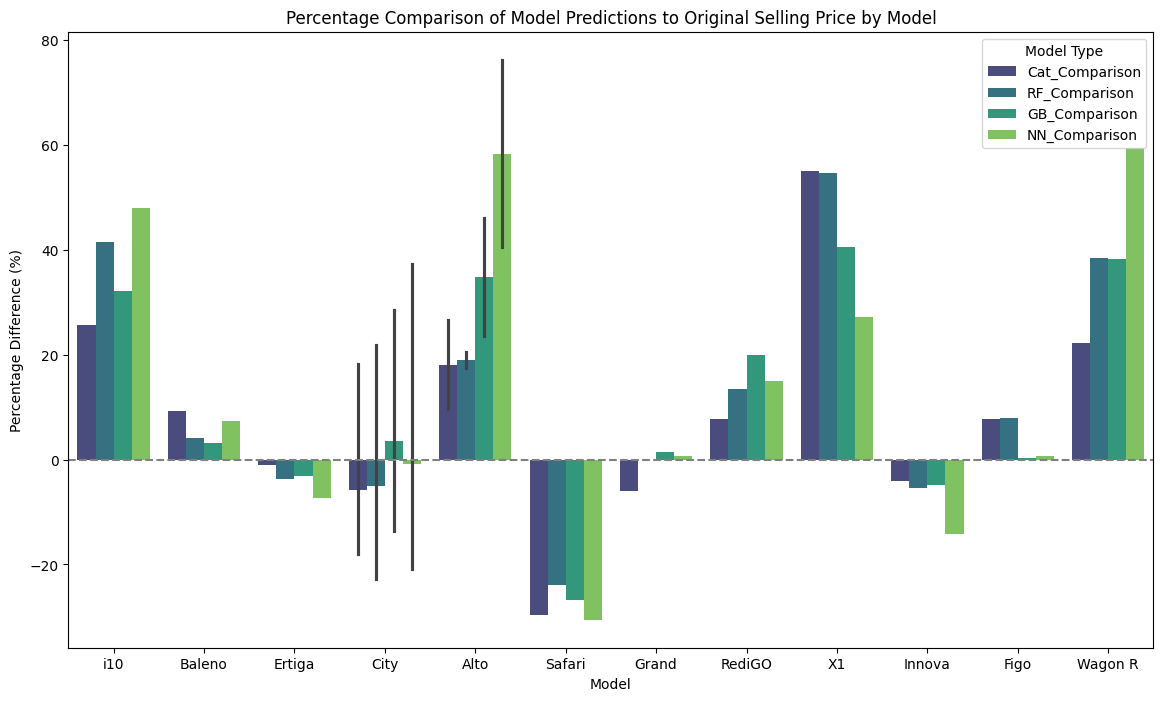

In [ ]:
# Melt the DataFrame for percentage comparisons
df_comparison = df.melt(id_vars=['Brand', 'Model', 'Selling Price'],
                        value_vars=['Cat_Comparison', 'RF_Comparison', 'GB_Comparison', 'NN_Comparison'],
                        var_name='Model_Type',
                        value_name='Percentage_Comparison')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=df_comparison, x='Model', y='Percentage_Comparison', hue='Model_Type', palette='viridis')
plt.title('Percentage Comparison of Model Predictions to Original Selling Price by Model')
plt.xlabel('Model')
plt.ylabel('Percentage Difference (%)')
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Model Type')
plt.show()

In [ ]:
models_to_sample = ['i10', 'X1', 'Safari']


sampled_dfs = []

# Loop over each model type
for model in models_to_sample:
    # Filter the DataFrame for the specific model
    filtered_df = df[df['model'] == model]


    if len(filtered_df) >= 2:
        sampled_df = filtered_df.sample(n=2, random_state=42)
    else:

        sampled_df = filtered_df


    sampled_dfs.append(sampled_df)


example = pd.concat(sampled_dfs, ignore_index=True)

# Select and display specific columns
columns_to_display = ['brand', 'model', 'vehicle_age', 'km_driven', 'selling_price']
example = example[columns_to_display]

# Print the resulting dataframe
print(example)

     brand   model  vehicle_age  km_driven  selling_price
0  Hyundai     i10           14      78000         225000
1  Hyundai     i10           13      73181         260000
2      BMW      X1            3      28000        3300000
3      BMW      X1            9      91000        1195000
4     Tata  Safari           14      80000         350000
5     Tata  Safari            7      75875         525000


# **Analysis of the Predictions of the models**

Analyzing the model predictions reveals that accurately predicting car prices can be quite challenging. At first glance, the model appears to perform poorly on specific cars, such as the 'i10', 'X1', and 'Safari'. However, a deeper examination provides more insight:


*   We see that the model got a BMW X1 with **9 years** age, **65000 km run with a selling price of 8,50,000 and in the training set we randomly get a similar example of 9 years old BMW X1 driven for 91000 km at a price of 11,95,000, indicating a discrepancy of about 40%**.
*   Similarly, the model recieved an example of a 12-year-old Hyundai i10 with 73,000 km driven to be 1,90,000. In the training data, a similar 13-year-old i10 with 78,181 km driven was priced at 2,60,000, showing a difference of approximately 37%.

This analysis suggests that while the model struggles with precise predictions, there are very notable variances in prices for similar vehicles within the dataset



# **Conclusion**


While the model faces challenges in making precise predictions, significant price variances for similar vehicles are evident within the dataset. These discrepancies can be attributed to several factors:

- **Variations in Vehicle Condition:** Differences in vehicle condition, such as worn-out parts, poor maintenance, engine noise, or even dents, can lead to significant price variations.

- **Market Demand:** The demand for specific car models can vary based on factors like urban versus rural settings. In metropolitan areas, discrepancies between supply and demand can impact prices.

- **Additional Features:** Features such as accident history or other unique attributes can also influence pricing.

- **Human Factors:** Pricing can be influenced by subjective factors, such as the seller’s asking price and the skill of negotiation, making it difficult to predict exact values.

# Recommendations

To improve the model’s accuracy, future work should focus on:

- **Incorporating Additional Data:** Including more information, especially for semi-luxury and luxury vehicles, could enhance predictions.

- **Detailed Vehicle Assessment:** Adding features that reflect the car’s appearance(dents or scratches), maintenance history, and condition can provide more context for pricing.

- **Location-Based Categorization:** Differentiating between urban, semi-urban, and rural areas in the dataset can help account for regional market variations.For eg. metro cities can have huge demand or huge supply of a car model at a time which could directly impact the price.

By addressing these aspects, we can refine the model to better capture the complexities of car pricing and improve prediction accuracy.
